In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
creep=pd.read_csv('creep_4CAT.csv')

In [3]:
creep.head()

,Temperature,Load(Mpa),Time Period(Hour),Time Period(Year),CEEQ(mm),Comment
0,500,110,0.00,0.000000,0.000000,A
1,500,110,0.05,0.000006,0.000000,A
2,500,110,0.10,0.000011,0.000015,A
3,500,110,0.15,0.000017,0.000029,A
4,500,110,0.20,0.000023,0.000044,A


In [37]:
feature=creep[['Temperature','Load(Mpa)','Time Period(Hour)']]

In [38]:
target=creep['Comment'].map({'A':0,'B':1,'C':2, 'D':3})

In [39]:
X=feature
y=target

## Cross Validation: Parameter Tuning

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [41]:
k_range=list(range(1,31))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores) 

[0.8582792762431053, 0.8606274535313299, 0.8509557613716854, 0.8405344629128283, 0.8373022048483122, 0.834850067423712, 0.8291785751604024, 0.8340366495887463, 0.8405274966907659, 0.8372558995231811, 0.8412948190091502, 0.838888367396247, 0.8324423767839407, 0.8388621413275347, 0.8324359251710375, 0.8292099089108748, 0.8300033523936966, 0.8243128100922869, 0.8243578763905495, 0.8243193666094649, 0.8154091646687359, 0.8113572370526855, 0.8121702451827668, 0.8194350760246236, 0.8218676488019643, 0.822654535767608, 0.8210676488019644, 0.8250999068664806, 0.8258998019622055, 0.8242868987363992]


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Cross-validated accuracy')

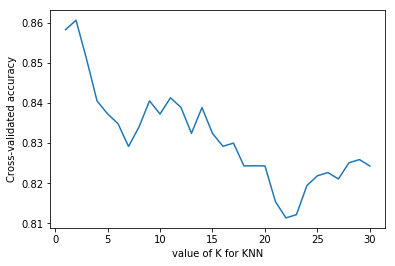

In [43]:
plt.plot(k_range,k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel('Cross-validated accuracy')

## Model selection


In [44]:
knn=KNeighborsClassifier(n_neighbors=2)
print(cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean())

0.8606274535313299


In [45]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean())

0.8275199861228991


## Training a machine learning model with scikit-learn

In [47]:
knn=KNeighborsClassifier(n_neighbors=2)

In [48]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')


In [55]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [56]:
knn.predict([[500,110,262800]])

array([2], dtype=int64)

In [57]:
knn.predict([[500,100,262800]])

array([1], dtype=int64)

In [58]:
knn.predict([[500,90,262800]])

array([1], dtype=int64)

In [59]:
knn.predict([[500,80,262800]])

array([0], dtype=int64)

In [60]:
knn.predict([[500,70,262800]])

array([0], dtype=int64)

In [61]:
knn.predict([[500,60,262800]])

array([0], dtype=int64)

In [62]:
knn.predict([[500,50,262800]])

array([0], dtype=int64)